# Build a Financial Analyst Tool-Use AI Agent

This project will focus on building a Tool-Use Agentic AI System which acts as a Financial Analyst & Advisor.

![](https://i.imgur.com/sHevAT8.png)


### Financial Analyst Tool-Use Agentic AI System

In this project, we will design a **Financial Analyst Tool-Use Agentic AI System** to assist investors with accurate, up-to-date stock market insights. We will be building the complete agent from scratch using **LangGraph**, a cutting-edge alternative to LangChain. The workflow comprises the following components:

1. **Agent System Prompt**:
   - The agent is designed to validate input queries for relevance and specificity.
   - It provides comprehensive market analysis or stock-specific insights depending on the user's query.
   - For invalid queries, the agent responds professionally and guides the user appropriately.


   **Flows**:
   - **Flow 1**: For general market trends, the agent analyzes data and suggests stock opportunities using tools like `SEARCH_WEB` and `GET_GENERAL_MARKET_DATA`.
   - **Flow 2**: For stock-specific queries, the agent validates the stock ticker, retrieves relevant data, and provides insights using tools such as `GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS` and `GET_STOCK_PRICE_METRICS`.

2. **Financial Analysis Tools**:
   The system integrates multiple tools to get useful financial data and metrics:
   - **SEARCH_WEB**: Fetches general stock market information from the web.
   - **GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS**: Provides insights into key financial metrics such as P/E ratio, ROE, etc.
   - **GET_STOCK_NEWS**: Extracts the latest news and updates related to stocks or markets.
   - **GET_GENERAL_MARKET_DATA**: Fetches data on overall market trends and performance.
   - **GET_STOCK_TICKER**: Validates and fetches stock ticker symbols based on user queries.
   - **GET_STOCK_PRICE_METRICS**: Retrieves price trends, performance, and metrics for specific stocks.

3. **Stock Market Data Providers**:
   The system ensures real-time, reliable data by integrating with top providers like Yahoo Finance, Finviz, TMX, Cboe, and more, through platforms like **OpenBB**.

4. **Message Trimmer**:
   A newly introduced component trims agent state message history to ensure they are well within the context window limit of the LLM.

5. **Tool-Use Agentic Framework**:
   The system employs **ReAct reasoning**, combining logical reasoning with dynamic tool usage. This framework ensures precise and actionable results by dynamically selecting the right tools based on the query.

6. **Final Response**:
   After processing the data from tool calls, the agentic system generates the final response.



## Install OpenAI, LangGraph and LangChain dependencies

In [1]:
!pip install langchain==0.3.14
!pip install langchain-openai==0.3.0
!pip install langchain-community==0.3.14
!pip install langgraph==0.2.64
# fix yfinance to stable version
!pip install yfinance==0.2.51

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.9/326.9 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.1
    Uninstalling langsmith-0.3.1:
      Successfully uninstalled langsmith-0.3.1
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Install OpenBB

In [2]:
!pip install openbb[all]==4.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of poetry-plugin-export to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━

## Enter Open AI API Key

In [1]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Enter OpenBB Key

Get a free API key from [here](https://my.openbb.co/app/platform/pat)

In [2]:
from getpass import getpass

OPENBB_PAT = getpass('Enter OpenBB Personal Access Token (PAT): ')

Enter OpenBB Personal Access Token (PAT): ··········


## Enter Tavily Search API Key

Get a free API key from [here](https://tavily.com/#api)

In [3]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

Enter Tavily Search API Key: ··········


## Setup Environment Variables

In [4]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

In [5]:
from openbb import obb
# takes 1 min to setup
obb.account.login(pat=OPENBB_PAT)

Extensions to add: alpha_vantage@1.3.5, biztoc@1.3.5, cboe@1.3.5, ecb@1.3.5, econometrics@1.4.5, finra@1.3.5, finviz@1.2.5, government_us@1.3.5, multpl@1.0.5, nasdaq@1.3.5, openbb_charting@2.2.5, quantitative@1.3.5, seeking_alpha@1.3.5, stockgrid@1.3.5, technical@1.3.5, tmx@1.2.5, tradier@1.2.5, wsj@1.3.5

Building...


## Create Financial Tools

**Financial Analysis Tools**:
   The system integrates multiple tools to get useful financial data and metrics:
   - **SEARCH_WEB**: Fetches general stock market information from the web.
   - **GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS**: Provides insights into key financial metrics such as P/E ratio, ROE, etc.
   - **GET_STOCK_NEWS**: Extracts the latest news and updates related to stocks or markets.
   - **GET_GENERAL_MARKET_DATA**: Fetches data on overall market trends and performance.
   - **GET_STOCK_TICKER**: Validates and fetches stock ticker symbols based on user queries.
   - **GET_STOCK_PRICE_METRICS**: Retrieves price trends, performance, and metrics for specific stocks.

In [6]:
from langchain_community.utilities.tavily_search import TavilySearchAPIWrapper
from langchain_core.tools import tool
import json
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

tavily_search = TavilySearchAPIWrapper()

@tool
def search_web(query: str, num_results=8) -> list:
    """Search the web for a query. Userful for general information or general news"""
    results = tavily_search.raw_results(query=query,
                                        max_results=num_results,
                                        search_depth='advanced',
                                        include_answer=False,
                                        include_raw_content=True)
    return results

@tool
def get_stock_ticker_symbol(stock_name: str) -> str:
    """Get the symbol, name and CIK for any publicly traded company"""
    # Use OpenBB to search for stock ticker symbol and company details by name.
    # The provider "sec" fetches data from the U.S. Securities and Exchange Commission (SEC).
    res = obb.equity.search(stock_name, provider="sec")

    # Convert the result to a DataFrame and format it as markdown for readability.
    stock_ticker_details = res.to_df().to_markdown()

    # Prepare the output with the stock details.
    output = """Here are the details of the company and its stock ticker symbol:\n\n""" + stock_ticker_details
    return output

@tool
def get_stock_price_metrics(stock_ticker: str) -> str:
    """Get historical stock price data, stock price quote and price performance data
       like price changes for a specific stock ticker"""

    # Fetch the latest stock price quote using "cboe" provider.
    res = obb.equity.price.quote(stock_ticker, provider='cboe')
    price_quote = res.to_df().to_markdown()

    # Retrieve stock price performance metrics (e.g., percentage change) using "finviz" provider.
    res = obb.equity.price.performance(symbol=stock_ticker, provider='finviz')
    price_performance = res.to_df().to_markdown()

    # Fetch historical price data for the past year using "yfinance" provider.
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=365)).strftime("%Y-%m-%d")
    res = obb.equity.price.historical(symbol=stock_ticker, start_date=start_date,
                                      interval='1d', provider='yfinance')
    price_historical = res.to_df().to_markdown()

    # Combine the results into a formatted output.
    output = ("""Here are the stock price metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Price Quote Metrics:\n\n" + price_quote +
              "\n\nPrice Performance Metrics:\n\n" + price_performance +
              "\n\nPrice Historical Data:\n\n" + price_historical)
    return output

@tool
def get_stock_fundamental_indicator_metrics(stock_ticker: str) -> str:
    """Get fundamental indicator metrics for a specific stock ticker"""

    # Retrieve fundamental financial ratios (e.g., P/E ratio, ROE) using "fmp" provider.
    res = obb.equity.fundamental.ratios(symbol=stock_ticker, period='annual',
                                        limit=10, provider='fmp')
    fundamental_ratios = res.to_df().to_markdown()

    # Fetch additional fundamental metrics (e.g., EBITDA, revenue growth) using "yfinance" provider.
    res = obb.equity.fundamental.metrics(symbol=stock_ticker, period='annual',
                                        limit=10, provider='yfinance')
    fundamental_metrics = res.to_df().to_markdown()

    # Combine fundamental ratios and metrics into a single output.
    output = ("""Here are the fundamental indicator metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Fundamental Ratios:\n\n" + fundamental_ratios +
              "\n\nFundamental Metrics:\n\n" + fundamental_metrics)
    return output

@tool
def get_stock_news(stock_ticker: str) -> str:
    """Get news article headlines for a specific stock ticker"""

    # Define the date range to fetch news (last 45 days).
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=45)).strftime("%Y-%m-%d")

    # Retrieve news headlines for the stock using "tmx" provider.
    res = obb.news.company(symbol=stock_ticker, start_date=start_date, provider='tmx', limit=50)
    news = res.to_df()

    # Extract relevant columns (symbols and titles) and format as markdown.
    news = news[['symbols', 'title']].to_markdown()

    # Prepare the output with the news headlines.
    output = ("""Here are the recent news headlines for the stock ticker symbol """ + stock_ticker + """: \n\n""" + news)
    return output

@tool
def get_general_market_data() -> str:
    """Get general data and indicators for the whole stock market including,
       most actively traded stocks based on volume, top price gainers and top price losers.
       Useful when you want an overview of the market and what stocks to look at."""

    # Retrieve the most actively traded stocks using "yfinance" provider.
    res = obb.equity.discovery.active(sort='desc', provider='yfinance', limit=15)
    most_active_stocks = res.to_df().to_markdown()

    # Fetch the top price gainers using "yfinance" provider.
    res = obb.equity.discovery.gainers(sort='desc', provider='yfinance', limit=15)
    price_gainers = res.to_df().to_markdown()

    # Retrieve the top price losers using "yfinance" provider.
    res = obb.equity.discovery.losers(sort='desc', provider='yfinance', limit=15)
    price_losers = res.to_df().to_markdown()

    # Combine the market data into a single formatted output.
    output = ("""Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:\n\n""" +
              "Most actively traded stocks:\n\n" + most_active_stocks +
              "\n\nTop price gainers:\n\n" + price_gainers +
              "\n\nTop price losers:\n\n" + price_losers)
    return output


## Try out Defined Tools

In [7]:
from IPython.display import display, Markdown

response = get_general_market_data.invoke({})
display(Markdown(response))

Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:

Most actively traded stocks:

|    | symbol   | name                            |   price |      change |   percent_change |    volume |    open |    high |      low |   previous_close |     ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   eps_forward |   pe_forward |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency   |
|---:|:---------|:--------------------------------|--------:|------------:|-----------------:|----------:|--------:|--------:|---------:|-----------------:|---------:|----------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|----------:|--------------:|-------------:|-----------------:|:-----------|:--------------------|:--------------------------|:-----------|
|  0 | NVDA     | NVIDIA Corporation              |  118.42 | -24.2       |       -0.169682  | 802699932 | 124.79  | 128.4   | 116.7    |           142.62 | 139.54   | 121.598   |     153.13  |     60.7   |  2.90011e+12 |          2.449e+10   |        1.744 |       67.9014   |      2.54 |          4.12 |     28.7427  |       0          | NMS        | America/New_York    | 2025-02-26 16:00:00-05:00 | USD        |
|  1 | ABEV     | Ambev S.A.                      |    1.83 |   0.0400001 |        0.0223464 | 134327079 |   1.815 |   1.84  |   1.8    |             1.79 |   2.037  |   2.2058  |       2.72  |      1.76  |  2.98941e+10 |          1.57279e+10 |        6.24  |        0.293269 |      0.15 |          0.19 |      9.63158 |       0.407821   | NYQ        | America/New_York    | 2024-10-31 07:30:00-04:00 | USD        |
|  2 | RGTI     | Rigetti Computing, Inc.         |   12.45 |  -0.75      |       -0.0568182 | 124179311 |  12.02  |  13.57  |  11.8    |            13.2  |   8.1038 |   2.7955  |      21.42  |      0.66  |  3.48661e+09 |          2.80049e+08 |        0.64  |       19.4531   |     -0.37 |         -0.33 |    -37.7273  |       0          | NCM        | America/New_York    | 2024-11-12 06:30:49-05:00 | USD        |
|  3 | SOFI     | SoFi Technologies, Inc.         |   16.08 |  -1.84      |       -0.102679  | 106900509 |  15.91  |  16.74  |  15.55   |            17.92 |  15.503  |   9.66217 |      18.42  |      6.01  |  1.74492e+10 |          1.08515e+09 |        5.646 |        2.84803  |      0.12 |          0.29 |     55.4483  |       0          | NMS        | America/New_York    | 2025-01-27 08:30:00-05:00 | USD        |
|  4 | LCID     | Lucid Group, Inc.               |    2.75 |  -0.04      |       -0.0143369 |  96302852 |   2.77  |   2.97  |   2.69   |             2.79 |   2.6141 |   2.93273 |       4.43  |      1.93  |  8.28215e+09 |          3.01169e+09 |        1.148 |        2.39547  |     -1.33 |         -0.88 |     -3.125   |       0          | NMS        | America/New_York    | 2025-02-25 16:00:00-05:00 | USD        |
|  5 | AAPL     | Apple Inc.                      |  229.86 |   7.08      |        0.0317802 |  94132139 | 224.03  | 232.15  | 224      |           222.78 | 239.143  | 218.098   |     260.1   |    164.08  |  3.45661e+12 |          1.50379e+10 |        3.767 |       61.0194   |      6.08 |          8.31 |     27.6606  |       0.00439896 | NMS        | America/New_York    | 2025-01-30 16:00:00-05:00 | USD        |
|  6 | AVGO     | Broadcom Inc.                   |  202.13 | -42.57      |       -0.173968  |  90030214 | 212.18  | 218.43  | 196.23   |           244.7  | 204.121  | 168.081   |     251.88  |    117.431 |  9.47456e+11 |          4.68736e+09 |       59.221 |        3.41315  |      1.3  |          6.17 |     32.7601  |       0          | NMS        | America/New_York    | 2024-12-12 16:15:07-05:00 | USD        |
|  7 | INTC     | Intel Corporation               |   20.29 |  -0.539999  |       -0.0259241 |  82510674 |  20.82  |  21.06  |  20.14   |            20.83 |  21.5954 |  25.8255  |      46.63  |     18.51  |  8.75108e+10 |          4.313e+09   |       23.099 |        0.878393 |     -3.74 |          0.97 |     20.9175  |       0.0237638  | NMS        | America/New_York    | 2025-01-30 19:00:00-05:00 | USD        |
|  8 | T        | AT&T Inc.                       |   24.14 |   1.42      |        0.0625    |  76390958 |  23.5   |  24.365 |  23.36   |            22.72 |  22.7664 |  20.1911  |      24.365 |     15.94  |  1.73212e+11 |          7.17529e+09 |       14.266 |        1.69214  |      1.23 |          2.24 |     10.7768  |       0          | NYQ        | America/New_York    | 2025-01-27 08:30:00-05:00 | USD        |
|  9 | PLTR     | Palantir Technologies Inc.      |   75.44 |  -3.54      |       -0.0448215 |  75342089 |  74.05  |  76.72  |  72.68   |            78.98 |  70.796  |  40.2916  |      84.797 |     16.03  |  1.71854e+11 |          2.18065e+09 |        1.982 |       38.0626   |      0.2  |          0.47 |    160.511   |       0          | NMS        | America/New_York    | 2025-02-03 16:00:00-05:00 | USD        |
| 10 | F        | Ford Motor Company              |   10.38 |   0.26      |        0.0256917 |  72594082 |  10.11  |  10.42  |  10.14   |            10.12 |  10.3818 |  11.3148  |      14.85  |      9.49  |  4.12531e+10 |          3.90344e+09 |       11.15  |        0.930942 |      0.88 |          1.75 |      5.93143 |       0.0592885  | NYQ        | America/New_York    | 2025-02-05 16:05:00-05:00 | USD        |
| 11 | TSM      | Taiwan Semiconductor Manufactur |  192.31 | -29.57      |       -0.13327   |  67721153 | 197.04  | 207     | 187.665  |           221.88 | 199.92   | 175.91    |     226.4   |    112.61  |  9.97425e+11 |          5.18655e+09 |      153.888 |        1.24968  |      6.92 |          8.08 |     23.8007  |       0          | NYQ        | America/New_York    | 2025-01-16 05:59:00-05:00 | USD        |
| 12 | SMCI     | Super Micro Computer, Inc.      |   29.07 |  -4.2       |       -0.12624   |  58813169 |  30.3   |  31.95  |  28.42   |            33.27 |  32.6036 |  57.518   |     122.9   |     17.25  |  1.70224e+10 |          5.85565e+08 |        9.32  |        3.1191   |      2.01 |          4.24 |      6.85613 |       0          | NMS        | America/New_York    | 2024-11-05 16:15:00-05:00 | USD        |
| 13 | RIOT     | Riot Platforms, Inc.            |   11.45 |  -2.09      |       -0.154357  |  56285902 |  12.62  |  12.62  |  11.0721 |            13.54 |  12.2835 |  10.0635  |      18.36  |      6.355 |  3.93796e+09 |          3.43927e+08 |        8.477 |        1.35071  |      0.15 |         -0.34 |    -33.6765  |       0          | NCM        | America/New_York    | 2024-10-30 16:15:08-04:00 | USD        |
| 14 | BBD      | Banco Bradesco Sa               |    2    |   0.0700001 |        0.0362695 |  53972189 |   1.97  |   2     |   1.955  |             1.93 |   2.0714 |   2.44295 |       3.36  |      1.84  |  2.02024e+10 |          5.29052e+09 |       15.755 |        0.126944 |      0.22 |          0.44 |      4.54545 |       0.577202   | NYQ        | America/New_York    | 2025-02-07 08:30:00-05:00 | USD        |

Top price gainers:

|    | symbol   | name                            |   price |    change |   percent_change |   volume |   open |     high |      low |   previous_close |       ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   dividend_yield | exchange   | exchange_timezone   | currency   |   eps_ttm |   eps_forward |   pe_forward | earnings_date             |
|---:|:---------|:--------------------------------|--------:|----------:|-----------------:|---------:|-------:|---------:|---------:|-----------------:|-----------:|----------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|-----------------:|:-----------|:--------------------|:-----------|----------:|--------------:|-------------:|:--------------------------|
|  0 | FFPP     | Fast Finance Pay Corp.          |    6.3  |  6.2349   |       95.7742    |    30407 |   0.1  |   0.1    |   0.0501 |           0.0651 |   0.222634 |   0.1324  |      6.3    |      0.02  |  6.93863e+09 |          1.10137e+09 |        0.007 |      900        |        0         | PNK        | America/New_York    | USD        |    nan    |        nan    |     nan      | nan                       |
|  1 | AKRO     | Akero Therapeutics, Inc.        |   51.71 | 25.53     |        0.975172  | 15116435 |  57.03 |  58.3999 |  48.4705 |          26.18   |  28.7549   |  25.9737  |     58.3999 |     15.32  |  3.60932e+09 |          6.97992e+07 |       10.606 |        4.87554  |        0         | NMS        | America/New_York    | USD        |     -3.78 |         -4.25 |     -12.1671 | 2024-11-08 07:00:00-05:00 |
|  2 | BBRYF    | Burberry Group Plc              |   14.85 |  1.62     |        0.122449  |    25780 |  13    |  13.23   |  13      |          13.23   |  11.9596   |  11.3185  |     16.91   |      7.5   |  5.32497e+09 |          3.58584e+08 |        3.216 |        4.61754  |        0         | PNK        | America/New_York    | USD        |      0.14 |          0.39 |      38.0769 | 2024-11-14 02:00:00-05:00 |
|  3 | UNVGY    | UNIVERSAL MUSIC GROUP           |   13.66 |  0.98     |        0.077287  |    17657 |  13.41 |  13.66   |  13.41   |          12.68   |  12.3916   |  12.6277  |     13.66   |     11.4   |  5.0021e+10  |          3.65809e+09 |        1.875 |        7.28533  |        0.0402208 | PNK        | America/New_York    | USD        |      0.43 |        nan    |     nan      | 2024-10-31 12:45:31-04:00 |
|  4 | AWK      | American Water Works Company, I |  129.95 |  8.32     |        0.0684042 |  1916959 | 122.72 | 130.215  | 122.585  |         121.63   | 129.046    | 134.039   |    150.68   |    113.34  |  2.53265e+10 |          1.94894e+08 |       53.167 |        2.44419  |        0.0242128 | NYQ        | America/New_York    | USD        |      5.04 |          5.7  |      22.7982 | 2025-02-19 16:00:00-05:00 |
|  5 | ARDT     | Ardent Health Partners, Inc.    |   15.2  |  0.95     |        0.0666667 |   567691 |  14.36 |  15.65   |  14.49   |          14.25   |  16.1356   |  17.2234  |     20.72   |     13.63  |  2.16954e+09 |          1.42733e+08 |        7.047 |        2.15695  |        0         | NYQ        | America/New_York    | USD        |      0.62 |          2    |       7.6    | nan                       |
|  6 | T        | AT&T Inc.                       |   24.14 |  1.42     |        0.0625    | 76390958 |  23.5  |  24.365  |  23.36   |          22.72   |  22.7664   |  20.1911  |     24.365  |     15.94  |  1.73212e+11 |          7.17529e+09 |       14.266 |        1.69214  |        0         | NYQ        | America/New_York    | USD        |      1.23 |          2.24 |      10.7768 | 2025-01-27 08:30:00-05:00 |
|  7 | HCA      | HCA Healthcare, Inc.            |  332    | 18.93     |        0.0604657 |  2389710 | 316.25 | 332.53   | 313.49   |         313.07   | 317.389    | 344.624   |    417.14   |    289.98  |  8.40946e+10 |          2.53297e+08 |       -8.573 |      -38.7262   |        0         | NYQ        | America/New_York    | USD        |     22.01 |         24.55 |      13.5234 | 2025-01-24 07:30:00-05:00 |
|  8 | LZRFY    | Localiza Rent A Car SA          |    5.48 |  0.31     |        0.0599613 |    50462 |   5.35 |   5.79   |   5.3    |           5.17   |   5.93378  |   7.69626 |     12.65   |      4.483 |  5.8705e+09  |          1.05375e+09 |       24.172 |        0.226709 |        0.302515  | OQX        | America/New_York    | USD        |      0.27 |        nan    |     nan      | 2024-11-11 14:00:00-05:00 |
|  9 | RKT      | Rocket Companies, Inc.          |   12.74 |  0.719999 |        0.0599001 |  4532735 |  12.01 |  12.94   |  12.035  |          12.02   |  12.512    |  15.077   |     21.38   |     10.06  |  2.53182e+10 |          1.384e+08   |        4.502 |        2.82985  |        0         | NYQ        | America/New_York    | USD        |     -0.12 |          0.66 |      19.303  | 2024-11-12 16:05:13-05:00 |
| 10 | WTRG     | Essential Utilities, Inc.       |   35.43 |  1.94     |        0.0579277 |  1618957 |  33.9  |  35.51   |  33.88   |          33.49   |  37.307    |  38.1937  |     41.78   |     33.18  |  9.72947e+09 |          2.74611e+08 |       22.508 |        1.57411  |        0.037235  | NYQ        | America/New_York    | USD        |      1.99 |          2.13 |      16.6338 | 2025-02-26 16:00:00-05:00 |
| 11 | SBAC     | SBA Communications Corporation  |  207.94 | 11.11     |        0.0564447 |   993342 | 205.4  | 208.45   | 203.37   |         196.83   | 210.567    | 213.81    |    252.64   |    183.64  |  2.23583e+10 |          1.07523e+08 |      -48.135 |       -4.31993  |        0.0192552 | NMS        | America/New_York    | USD        |      6.34 |          9.17 |      22.6761 | 2024-10-28 16:01:00-04:00 |
| 12 | MTN      | Vail Resorts, Inc.              |  176    |  9.3      |        0.0557889 |  1219554 | 171    | 178.46   | 168.72   |         166.7    | 182.942    | 183.659   |    236.92   |    165     |  6.58916e+09 |          3.74384e+07 |       19.302 |        9.11823  |        0         | NYQ        | America/New_York    | USD        |      6.07 |          8.39 |      20.9774 | 2024-12-09 16:05:09-05:00 |
| 13 | ZGN      | Ermenegildo Zegna N.V.          |    9.52 |  0.490001 |        0.0542636 |   908226 |   9    |   9.525  |   9.01   |           9.03   |   8.1384   |  10.0114  |     15.26   |      7.13  |  2.403e+09   |          2.52416e+08 |        3.378 |        2.81824  |        0.013289  | NYQ        | America/New_York    | USD        |      0.41 |          0.45 |      21.1556 | 2025-03-27 08:30:00-04:00 |
| 14 | SMG      | Scotts Miracle-Gro Company (The |   77.7  |  3.96999  |        0.053845  |  1264011 |  73.96 |  77.78   |  73.1957 |          73.73   |  71.968    |  72.3006  |     93.9    |     53.43  |  4.46414e+09 |          5.74535e+07 |       -6.865 |      -11.3183   |        0.0358063 | NYQ        | America/New_York    | USD        |     -0.61 |          4.24 |      18.3255 | 2025-01-29 08:30:00-05:00 |

Top price losers:

|    | symbol   | name                           |   price |   change |   percent_change |   volume |    open |     high |     low |   previous_close |     ma50 |    ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency   |   eps_forward |   pe_forward |
|---:|:---------|:-------------------------------|--------:|---------:|-----------------:|---------:|--------:|---------:|--------:|-----------------:|---------:|---------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|----------:|-----------------:|:-----------|:--------------------|:--------------------------|:-----------|--------------:|-------------:|
|  0 | IESC     | IES Holdings, Inc.             |  215    |   -70.04 |        -0.24572  |   393473 | 263.01  | 263.53   | 213.515 |           285.04 | 253.52   | 188.064  |     320.08  |     81.89  |  4.30142e+09 |          2.00066e+07 |       28.255 |         7.60927 |      9.89 |      0           | NGM        | America/New_York    | 2024-11-22 07:45:00-05:00 | USD        |        nan    |     nan      |
|  1 | BTDR     | Bitdeer Technologies Group     |   15.54 |    -5.12 |        -0.247822 | 11949845 |  19.16  |  19.249  |  15.1   |            20.66 |  17.9372 |  10.2296 |      26.99  |      5.23  |  2.99145e+09 |          1.441e+08   |        2.989 |         5.19906 |     -0.56 |      0           | NCM        | America/New_York    | 2024-11-18 07:00:00-05:00 | USD        |          0.29 |      53.5862 |
|  2 | BE       | Bloom Energy Corporation       |   22.42 |    -7.39 |        -0.247903 | 21423207 |  24.63  |  24.82   |  21     |            29.81 |  23.8344 |  14.9205 |      29.825 |      8.412 |  5.12467e+09 |          2.28576e+08 |        1.886 |        11.8876  |     -0.54 |      0           | NYQ        | America/New_York    | 2024-11-07 16:30:00-05:00 | USD        |          0.37 |      60.5946 |
|  3 | SITM     | SiTime Corporation             |  185.9  |   -61.71 |        -0.249223 |   559649 | 232.6   | 234.495  | 182.56  |           247.61 | 227.205  | 159.919  |     268.18  |     72.39  |  4.343e+09   |          2.3362e+07  |       29.802 |         6.23784 |     -4.14 |      0           | NGM        | America/New_York    | 2025-02-05 16:00:00-05:00 | USD        |          1.45 |     128.207  |
|  4 | OKLO     | Oklo Inc.                      |   31.11 |   -10.71 |        -0.256098 | 42856251 |  32.68  |  34.95   |  29.06  |            41.82 |  23.5432 |  13.8887 |      43.7   |      5.35  |  4.25572e+09 |          1.36796e+08 |      -12.28  |        -2.53339 |     -0.12 |      0           | NYQ        | America/New_York    | 2024-11-14 16:05:00-05:00 | USD        |         -0.39 |     -79.7692 |
|  5 | FIX      | Comfort Systems USA, Inc.      |  404.24 |  -139.92 |        -0.25713  |  1372826 | 484.03  | 479.795  | 403     |           544.16 | 470.081  | 372.747  |     553.09  |    212.65  |  1.4388e+10  |          3.55926e+07 |       44.75  |         9.0333  |     13.06 |      0.00202146  | NYQ        | America/New_York    | nan                       | USD        |         16.99 |      23.7928 |
|  6 | MOD      | Modine Manufacturing Company   |   97.49 |   -34.75 |        -0.26278  |  4054806 | 120.03  | 121.25   |  94.21  |           132.24 | 128.829  | 113.514  |     146.84  |     60     |  5.11853e+09 |          5.25031e+07 |       16.358 |         5.95977 |      3.04 |      0           | NYQ        | America/New_York    | 2025-02-04 16:00:00-05:00 | USD        |          4.74 |      20.5675 |
|  7 | SMR      | NuScale Power Corporation      |   20.27 |    -7.7  |        -0.275295 | 24892920 |  23.15  |  23.75   |  19.66  |            27.97 |  23.2054 |  13.5983 |      32.3   |      2.455 |  2.4506e+09  |          1.20898e+08 |        1.635 |        12.3976  |     -0.95 |      0           | NYQ        | America/New_York    | 2024-11-07 16:15:00-05:00 | USD        |         -0.47 |     -43.1277 |
|  8 | ALAB     | Astera Labs, Inc.              |   83.16 |   -32.39 |        -0.280312 | 16583166 | 102.24  | 103      |  79.55  |           115.55 | 119.203  |  74.522  |     147.39  |     36.215 |  1.31901e+10 |          1.58611e+08 |        5.611 |        14.8209  |     -0.59 |      0           | NMS        | America/New_York    | 2025-02-10 16:00:00-05:00 | USD        |          1.15 |      72.3131 |
|  9 | CLS      | Celestica, Inc.                |   87.36 |   -34.33 |        -0.28211  | 16588819 | 105.63  | 107.73   |  86.12  |           121.69 |  95.36   |  64.0853 |     131.23  |     32.55  |  1.01651e+10 |          1.16359e+08 |       15.395 |         5.67457 |      3.16 |      0           | NYQ        | America/New_York    | 2025-01-29 16:00:00-05:00 | USD        |          4.45 |      19.6315 |
| 10 | VST      | Vistra Corp.                   |  137.08 |   -54.03 |        -0.282717 | 32105955 | 154.09  | 156.93   | 132.593 |           191.11 | 155.051  | 108.607  |     199.84  |     40.57  |  4.66382e+10 |          3.40226e+08 |        8.702 |        15.7527  |      5.31 |      0.00452619  | NYQ        | America/New_York    | 2024-11-07 07:00:21-05:00 | USD        |          6.9  |      19.8667 |
| 11 | CORZ     | Core Scientific, Inc.          |   11.28 |    -4.7  |        -0.294118 | 51359095 |  13.02  |  13.25   |  10.5   |            15.98 |  15.6814 |  10.6612 |      18.629 |      2.61  |  3.14997e+09 |          2.79253e+08 |       -2.607 |        -4.32681 |     -4.23 |      0           | NMS        | America/New_York    | 2024-11-06 16:10:00-05:00 | USD        |          0.31 |      36.3871 |
| 12 | VRT      | Vertiv Holdings, LLC           |  102.6  |   -43.72 |        -0.298797 | 45750313 | 117.05  | 121.47   |  99.11  |           146.32 | 128.118  | 100.776  |     155.84  |     55     |  3.85095e+10 |          3.75336e+08 |        4.833 |        21.2291  |      1.51 |      0.000683434 | NYQ        | America/New_York    | 2025-02-12 08:30:00-05:00 | USD        |          3.44 |      29.8256 |
| 13 | CRDO     | Credo Technology Group Holding |   55.6  |   -24.87 |        -0.309059 | 19914534 |  68.206 |  68.5502 |  51.81  |            80.47 |  64.3672 |  37.4692 |      86.69  |     16.82  |  9.29849e+09 |          1.67239e+08 |        3.288 |        16.91    |     -0.14 |      0           | NMS        | America/New_York    | 2024-12-02 16:05:01-05:00 | USD        |          0.77 |      72.2078 |
| 14 | NBIS     | Nebius Group N.V.              |   26.08 |   -15.61 |        -0.37443  | 43796321 |  33.5   |  33.59   |  24.41  |            41.69 |  28.8891 |  26.895  |      43.66  |     14.09  |  6.14064e+09 |          1.99756e+08 |       14.416 |         1.8091  |     -0.01 |      0           | NMS        | America/New_York    | 2024-10-31 07:11:36-04:00 | USD        |        nan    |     nan      |

In [8]:
response = get_stock_ticker_symbol.invoke('Nvidia')
display(Markdown(response))

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name        |     cik |
|---:|:---------|:------------|--------:|
|  0 | NVDA     | NVIDIA CORP | 1045810 |

In [9]:
response = get_stock_price_metrics.invoke('NVDA')
display(Markdown(response))

Here are the stock price metrics and data for the stock ticker symbol NVDA: 

Price Quote Metrics:

|    | symbol   | asset_type   | name                   |    bid |   bid_size |    ask |   ask_size |   last_price | last_tick   | last_timestamp      |   open |   high |   low |   close |    volume |   prev_close |   change |   change_percent |   year_high |   year_low |    iv30 |   iv30_annual_high |   hv30_annual_high |   iv30_annual_low |   hv30_annual_low |   iv60_annual_high |   hv60_annual_high |   iv60_annual_low |   hv60_annual_low |   iv90_annual_high |   hv90_annual_high |   iv90_annual_low |   hv90_annual_low |
|---:|:---------|:-------------|:-----------------------|-------:|-----------:|-------:|-----------:|-------------:|:------------|:--------------------|-------:|-------:|------:|--------:|----------:|-------------:|---------:|-----------------:|------------:|-----------:|--------:|-------------------:|-------------------:|------------------:|------------------:|-------------------:|-------------------:|------------------:|------------------:|-------------------:|-------------------:|------------------:|------------------:|
|  0 | NVDA     | stock        | NVIDIA CORPORATION COM | 120.18 |          1 | 120.21 |        384 |       120.18 | down        | 2025-01-27 15:59:59 |  124.8 |  128.4 | 116.7 |  118.42 | 818830895 |       142.62 |    -24.2 |        -0.169682 |      153.13 |       60.7 | 0.69299 |            0.88894 |           0.786711 |           0.33438 |            0.3007 |            0.75561 |           0.688086 |           0.38376 |          0.294741 |            0.69187 |           0.628993 |           0.39929 |          0.328303 |

Price Performance Metrics:

|    | symbol   |   one_day |   one_week |   one_month |   three_month |   six_month |     ytd |   one_year |   volatility_week |   volatility_month |   price |      volume |   average_volume |   relative_volume |   analyst_score |
|---:|:---------|----------:|-----------:|------------:|--------------:|------------:|--------:|-----------:|------------------:|-------------------:|--------:|------------:|-----------------:|------------------:|----------------:|
|  0 | NVDA     |   -0.1697 |    -0.1401 |     -0.1521 |       -0.1515 |      0.0547 | -0.1182 |     0.9299 |            0.0476 |             0.0407 |  118.42 | 8.02308e+08 |       2.1101e+08 |               3.8 |            1.33 |

Price Historical Data:

| date       |    open |    high |     low |   close |      volume |   split_ratio |   dividend |
|:-----------|--------:|--------:|--------:|--------:|------------:|--------------:|-----------:|
| 2024-01-29 |  61.232 |  62.489 |  60.907 |  62.465 | 3.48733e+08 |             0 |      0     |
| 2024-01-30 |  62.9   |  63.493 |  62.26  |  62.774 | 4.10735e+08 |             0 |      0     |
| 2024-01-31 |  61.44  |  62.269 |  60.7   |  61.527 | 4.53795e+08 |             0 |      0     |
| 2024-02-01 |  62.1   |  63.191 |  61.65  |  63.027 | 3.69146e+08 |             0 |      0     |
| 2024-02-02 |  63.974 |  66.6   |  63.69  |  66.16  | 4.76578e+08 |             0 |      0     |
| 2024-02-05 |  68.225 |  69.497 |  67.205 |  69.332 | 6.80078e+08 |             0 |      0     |
| 2024-02-06 |  69.63  |  69.754 |  66.3   |  68.223 | 6.83111e+08 |             0 |      0     |
| 2024-02-07 |  68.319 |  70.22  |  67.6   |  70.099 | 4.95575e+08 |             0 |      0     |
| 2024-02-08 |  70.074 |  70.794 |  69.455 |  69.641 | 4.14422e+08 |             0 |      0     |
| 2024-02-09 |  70.533 |  72.185 |  70.212 |  72.133 | 4.36637e+08 |             0 |      0     |
| 2024-02-12 |  72.6   |  74.611 |  71.25  |  72.248 | 6.1371e+08  |             0 |      0     |
| 2024-02-13 |  70.4   |  73.45  |  69.62  |  72.128 | 6.0258e+08  |             0 |      0     |
| 2024-02-14 |  73.202 |  74.236 |  71.938 |  73.9   | 5.04917e+08 |             0 |      0     |
| 2024-02-15 |  73.869 |  73.975 |  72.4   |  72.658 | 4.20122e+08 |             0 |      0     |
| 2024-02-16 |  74.1   |  74.402 |  72.501 |  72.613 | 4.95327e+08 |             0 |      0     |
| 2024-02-20 |  71.947 |  71.956 |  67.734 |  69.452 | 7.04833e+08 |             0 |      0     |
| 2024-02-21 |  68.006 |  68.888 |  66.248 |  67.472 | 6.90298e+08 |             0 |      0     |
| 2024-02-22 |  75.025 |  78.575 |  74.22  |  78.538 | 8.651e+08   |             0 |      0     |
| 2024-02-23 |  80.79  |  82.394 |  77.57  |  78.817 | 8.29388e+08 |             0 |      0     |
| 2024-02-26 |  79.7   |  80.646 |  78.505 |  79.092 | 5.03973e+08 |             0 |      0     |
| 2024-02-27 |  79.381 |  79.48  |  77.162 |  78.701 | 3.91705e+08 |             0 |      0     |
| 2024-02-28 |  77.62  |  78.933 |  77.125 |  77.663 | 3.9311e+08  |             0 |      0     |
| 2024-02-29 |  79.094 |  79.99  |  78.35  |  79.112 | 5.07289e+08 |             0 |      0     |
| 2024-03-01 |  80     |  82.3   |  79.435 |  82.279 | 4.79135e+08 |             0 |      0     |
| 2024-03-04 |  84.13  |  87.695 |  83.719 |  85.237 | 6.15616e+08 |             0 |      0     |
| 2024-03-05 |  85.27  |  86.097 |  83.417 |  85.964 | 5.20639e+08 |             0 |      0.004 |
| 2024-03-06 |  88.022 |  89.724 |  87.03  |  88.7   | 5.8252e+08  |             0 |      0     |
| 2024-03-07 |  90.158 |  92.767 |  89.602 |  92.669 | 6.08119e+08 |             0 |      0     |
| 2024-03-08 |  95.138 |  97.4   |  86.506 |  87.528 | 1.14227e+09 |             0 |      0     |
| 2024-03-11 |  86.429 |  88.797 |  84.166 |  85.774 | 6.78364e+08 |             0 |      0     |
| 2024-03-12 |  88.049 |  91.96  |  86.15  |  91.913 | 6.68075e+08 |             0 |      0     |
| 2024-03-13 |  91.055 |  91.504 |  88.435 |  90.888 | 6.35713e+08 |             0 |      0     |
| 2024-03-14 |  89.577 |  90.646 |  86.6   |  87.944 | 6.02318e+08 |             0 |      0     |
| 2024-03-15 |  86.93  |  89.546 |  86.257 |  87.837 | 6.42086e+08 |             0 |      0     |
| 2024-03-18 |  90.388 |  92.405 |  87.085 |  88.455 | 6.68976e+08 |             0 |      0     |
| 2024-03-19 |  86.7   |  90.544 |  85.01  |  89.398 | 6.72171e+08 |             0 |      0     |
| 2024-03-20 |  89.797 |  90.41  |  88.223 |  90.372 | 4.79063e+08 |             0 |      0     |
| 2024-03-21 |  92.3   |  92.648 |  90.405 |  91.435 | 4.80372e+08 |             0 |      0     |
| 2024-03-22 |  91.141 |  94.778 |  90.834 |  94.289 | 5.86719e+08 |             0 |      0     |
| 2024-03-25 |  93.941 |  96.766 |  93.51  |  95.002 | 5.52136e+08 |             0 |      0     |
| 2024-03-26 |  95.851 |  96.375 |  92.502 |  92.561 | 5.13648e+08 |             0 |      0     |
| 2024-03-27 |  93.112 |  93.24  |  89.123 |  90.25  | 5.86067e+08 |             0 |      0     |
| 2024-03-28 |  90     |  91.3   |  89.193 |  90.356 | 4.35212e+08 |             0 |      0     |
| 2024-04-01 |  90.299 |  92.225 |  89.204 |  90.363 | 4.52441e+08 |             0 |      0     |
| 2024-04-02 |  88.448 |  90.094 |  87.62  |  89.452 | 4.33064e+08 |             0 |      0     |
| 2024-04-03 |  88.484 |  90.374 |  88.4   |  88.964 | 3.70067e+08 |             0 |      0     |
| 2024-04-04 |  90.406 |  90.634 |  85.88  |  85.905 | 4.34965e+08 |             0 |      0     |
| 2024-04-05 |  86.866 |  88.481 |  85.926 |  88.008 | 3.99678e+08 |             0 |      0     |
| 2024-04-08 |  88.7   |  88.83  |  86.732 |  87.133 | 2.8322e+08  |             0 |      0     |
| 2024-04-09 |  87.442 |  87.635 |  83.022 |  85.354 | 5.03547e+08 |             0 |      0     |
| 2024-04-10 |  83.926 |  87.4   |  83.709 |  87.039 | 4.31929e+08 |             0 |      0     |
| 2024-04-11 |  87.42  |  90.739 |  86.926 |  90.616 | 4.31637e+08 |             0 |      0     |
| 2024-04-12 |  89.699 |  90.175 |  87.53  |  88.186 | 4.26805e+08 |             0 |      0     |
| 2024-04-15 |  89.098 |  90.613 |  85.929 |  86.001 | 4.43077e+08 |             0 |      0     |
| 2024-04-16 |  86.433 |  88.118 |  86.064 |  87.415 | 3.70453e+08 |             0 |      0     |
| 2024-04-17 |  88.34  |  88.775 |  83.95  |  84.035 | 4.954e+08   |             0 |      0     |
| 2024-04-18 |  84.97  |  86.19  |  82.402 |  84.671 | 4.4726e+08  |             0 |      0     |
| 2024-04-19 |  83.15  |  84.324 |  75.606 |  76.2   | 8.75198e+08 |             0 |      0     |
| 2024-04-22 |  78.104 |  80.073 |  76.4   |  79.518 | 5.96341e+08 |             0 |      0     |
| 2024-04-23 |  80.769 |  82.769 |  80.264 |  82.423 | 4.38559e+08 |             0 |      0     |
| 2024-04-24 |  83.95  |  84.082 |  79.183 |  79.677 | 5.12208e+08 |             0 |      0     |
| 2024-04-25 |  78.868 |  83.323 |  78.223 |  82.632 | 4.24641e+08 |             0 |      0     |
| 2024-04-26 |  83.818 |  88.331 |  83.387 |  87.735 | 5.51011e+08 |             0 |      0     |
| 2024-04-29 |  87.595 |  87.992 |  85.266 |  87.757 | 3.88971e+08 |             0 |      0     |
| 2024-04-30 |  87.24  |  88.819 |  86.3   |  86.402 | 3.63709e+08 |             0 |      0     |
| 2024-05-01 |  85.077 |  86     |  81.255 |  83.041 | 5.59863e+08 |             0 |      0     |
| 2024-05-02 |  84.449 |  86.237 |  83.2   |  85.817 | 3.77898e+08 |             0 |      0     |
| 2024-05-03 |  87.789 |  89.281 |  87.04  |  88.789 | 3.98341e+08 |             0 |      0     |
| 2024-05-06 |  89.39  |  92.22  |  89.055 |  92.14  | 3.76203e+08 |             0 |      0     |
| 2024-05-07 |  91.098 |  91.781 |  89.011 |  90.554 | 4.37342e+08 |             0 |      0     |
| 2024-05-08 |  89.483 |  91.194 |  89.42  |  90.412 | 3.25721e+08 |             0 |      0     |
| 2024-05-09 |  90.529 |  91.072 |  88.231 |  88.747 | 3.78013e+08 |             0 |      0     |
| 2024-05-10 |  90.305 |  91.401 |  89.227 |  89.878 | 3.35325e+08 |             0 |      0     |
| 2024-05-13 |  90.478 |  90.998 |  88.529 |  90.399 | 2.8968e+08  |             0 |      0     |
| 2024-05-14 |  89.599 |  91.651 |  88.934 |  91.356 | 2.96507e+08 |             0 |      0     |
| 2024-05-15 |  92.472 |  94.862 |  91.599 |  94.63  | 4.17735e+08 |             0 |      0     |
| 2024-05-16 |  94.91  |  95.819 |  94.103 |  94.359 | 3.23952e+08 |             0 |      0     |
| 2024-05-17 |  94.369 |  94.74  |  91.806 |  92.479 | 3.59691e+08 |             0 |      0     |
| 2024-05-20 |  93.75  |  95.2   |  93.44  |  94.78  | 3.18764e+08 |             0 |      0     |
| 2024-05-21 |  93.599 |  95.4   |  93.18  |  95.386 | 3.28946e+08 |             0 |      0     |
| 2024-05-22 |  95.459 |  96.02  |  93.249 |  94.95  | 5.48648e+08 |             0 |      0     |
| 2024-05-23 | 102.028 | 106.32  | 101.52  | 103.799 | 8.35065e+08 |             0 |      0     |
| 2024-05-24 | 104.449 | 106.475 | 103     | 106.469 | 4.29494e+08 |             0 |      0     |
| 2024-05-28 | 110.244 | 114.939 | 109.883 | 113.901 | 6.52728e+08 |             0 |      0     |
| 2024-05-29 | 113.05  | 115.492 | 110.901 | 114.825 | 5.57442e+08 |             0 |      0     |
| 2024-05-30 | 114.65  | 115.819 | 109.663 | 110.5   | 4.8735e+08  |             0 |      0     |
| 2024-05-31 | 112.52  | 112.717 | 106.94  | 109.633 | 6.13263e+08 |             0 |      0     |
| 2024-06-03 | 113.621 | 115     | 112.003 | 115     | 4.38392e+08 |             0 |      0     |
| 2024-06-04 | 115.716 | 116.6   | 114.045 | 116.437 | 4.03324e+08 |             0 |      0     |
| 2024-06-05 | 118.371 | 122.449 | 117.468 | 122.44  | 5.28402e+08 |             0 |      0     |
| 2024-06-06 | 124.048 | 125.587 | 118.32  | 120.998 | 6.64696e+08 |             0 |      0     |
| 2024-06-07 | 119.77  | 121.692 | 118.022 | 120.888 | 4.12386e+08 |             0 |      0     |
| 2024-06-10 | 120.37  | 123.1   | 117.01  | 121.79  | 3.14163e+08 |            10 |      0     |
| 2024-06-11 | 121.77  | 122.87  | 118.74  | 120.91  | 2.22551e+08 |             0 |      0.01  |
| 2024-06-12 | 123.06  | 126.88  | 122.57  | 125.2   | 2.99595e+08 |             0 |      0     |
| 2024-06-13 | 129.39  | 129.8   | 127.16  | 129.61  | 2.60704e+08 |             0 |      0     |
| 2024-06-14 | 129.96  | 132.84  | 128.32  | 131.88  | 3.0932e+08  |             0 |      0     |
| 2024-06-17 | 132.99  | 133.73  | 129.58  | 130.98  | 2.88504e+08 |             0 |      0     |
| 2024-06-18 | 131.14  | 136.33  | 130.69  | 135.58  | 2.94335e+08 |             0 |      0     |
| 2024-06-20 | 139.8   | 140.76  | 129.52  | 130.78  | 5.17768e+08 |             0 |      0     |
| 2024-06-21 | 127.12  | 130.63  | 124.3   | 126.57  | 6.55485e+08 |             0 |      0     |
| 2024-06-24 | 123.24  | 124.46  | 118.04  | 118.11  | 4.76061e+08 |             0 |      0     |
| 2024-06-25 | 121.2   | 126.5   | 119.32  | 126.09  | 4.25788e+08 |             0 |      0     |
| 2024-06-26 | 126.13  | 128.12  | 122.6   | 126.4   | 3.62976e+08 |             0 |      0     |
| 2024-06-27 | 124.1   | 126.41  | 122.92  | 123.99  | 2.52572e+08 |             0 |      0     |
| 2024-06-28 | 124.58  | 127.71  | 122.75  | 123.54  | 3.15517e+08 |             0 |      0     |
| 2024-07-01 | 123.47  | 124.84  | 118.83  | 124.3   | 2.84886e+08 |             0 |      0     |
| 2024-07-02 | 121.13  | 123.41  | 121.03  | 122.67  | 2.18374e+08 |             0 |      0     |
| 2024-07-03 | 121.66  | 128.28  | 121.36  | 128.28  | 2.15749e+08 |             0 |      0     |
| 2024-07-05 | 127.38  | 128.85  | 125.68  | 125.83  | 2.14177e+08 |             0 |      0     |
| 2024-07-08 | 127.49  | 130.77  | 127.04  | 128.2   | 2.37677e+08 |             0 |      0     |
| 2024-07-09 | 130.35  | 133.82  | 128.65  | 131.38  | 2.85367e+08 |             0 |      0     |
| 2024-07-10 | 134.03  | 135.1   | 132.42  | 134.91  | 2.48979e+08 |             0 |      0     |
| 2024-07-11 | 135.75  | 136.15  | 127.05  | 127.4   | 3.74783e+08 |             0 |      0     |
| 2024-07-12 | 128.26  | 131.92  | 127.22  | 129.24  | 2.5268e+08  |             0 |      0     |
| 2024-07-15 | 130.56  | 131.39  | 127.18  | 128.44  | 2.08326e+08 |             0 |      0     |
| 2024-07-16 | 128.44  | 129.04  | 124.58  | 126.36  | 2.1477e+08  |             0 |      0     |
| 2024-07-17 | 121.35  | 121.85  | 116.72  | 117.99  | 3.90086e+08 |             0 |      0     |
| 2024-07-18 | 121.85  | 122.4   | 116.56  | 121.09  | 3.2098e+08  |             0 |      0     |
| 2024-07-19 | 120.35  | 121.6   | 117.37  | 117.93  | 2.17224e+08 |             0 |      0     |
| 2024-07-22 | 120.35  | 124.07  | 119.86  | 123.54  | 2.58069e+08 |             0 |      0     |
| 2024-07-23 | 122.78  | 124.69  | 122.1   | 122.59  | 1.73911e+08 |             0 |      0     |
| 2024-07-24 | 119.17  | 119.95  | 113.44  | 114.25  | 3.27777e+08 |             0 |      0     |
| 2024-07-25 | 113.04  | 116.63  | 106.3   | 112.28  | 4.60067e+08 |             0 |      0     |
| 2024-07-26 | 116.19  | 116.2   | 111.58  | 113.06  | 2.93399e+08 |             0 |      0     |
| 2024-07-29 | 113.69  | 116.28  | 111.3   | 111.59  | 2.48152e+08 |             0 |      0     |
| 2024-07-30 | 111.52  | 111.99  | 102.54  | 103.73  | 4.86833e+08 |             0 |      0     |
| 2024-07-31 | 112.9   | 118.34  | 110.88  | 117.02  | 4.73174e+08 |             0 |      0     |
| 2024-08-01 | 117.53  | 120.16  | 106.81  | 109.21  | 5.23462e+08 |             0 |      0     |
| 2024-08-02 | 103.76  | 108.72  | 101.37  | 107.27  | 4.82028e+08 |             0 |      0     |
| 2024-08-05 |  92.06  | 103.41  |  90.69  | 100.45  | 5.52842e+08 |             0 |      0     |
| 2024-08-06 | 103.84  | 107.71  | 100.55  | 104.25  | 4.09012e+08 |             0 |      0     |
| 2024-08-07 | 107.81  | 108.8   |  98.69  |  98.91  | 4.1144e+08  |             0 |      0     |
| 2024-08-08 | 102     | 105.5   |  97.52  | 104.97  | 3.9191e+08  |             0 |      0     |
| 2024-08-09 | 105.64  | 106.6   | 103.43  | 104.75  | 2.90844e+08 |             0 |      0     |
| 2024-08-12 | 106.32  | 111.07  | 106.26  | 109.02  | 3.2556e+08  |             0 |      0     |
| 2024-08-13 | 112.44  | 116.23  | 111.58  | 116.14  | 3.12647e+08 |             0 |      0     |
| 2024-08-14 | 118.53  | 118.6   | 114.07  | 118.08  | 3.39246e+08 |             0 |      0     |
| 2024-08-15 | 118.76  | 123.24  | 117.47  | 122.86  | 3.18087e+08 |             0 |      0     |
| 2024-08-16 | 121.94  | 125     | 121.18  | 124.58  | 3.0259e+08  |             0 |      0     |
| 2024-08-19 | 124.28  | 130     | 123.42  | 130     | 3.18334e+08 |             0 |      0     |
| 2024-08-20 | 128.4   | 129.88  | 125.89  | 127.25  | 3.00087e+08 |             0 |      0     |
| 2024-08-21 | 127.32  | 129.35  | 126.66  | 128.5   | 2.57884e+08 |             0 |      0     |
| 2024-08-22 | 130.02  | 130.75  | 123.1   | 123.74  | 3.76189e+08 |             0 |      0     |
| 2024-08-23 | 125.86  | 129.6   | 125.22  | 129.37  | 3.2323e+08  |             0 |      0     |
| 2024-08-26 | 129.57  | 131.26  | 124.37  | 126.46  | 3.31965e+08 |             0 |      0     |
| 2024-08-27 | 125.05  | 129.2   | 123.88  | 128.3   | 3.03135e+08 |             0 |      0     |
| 2024-08-28 | 128.12  | 128.33  | 122.64  | 125.61  | 4.48101e+08 |             0 |      0     |
| 2024-08-29 | 121.36  | 124.43  | 116.71  | 117.59  | 4.53023e+08 |             0 |      0     |
| 2024-08-30 | 119.53  | 121.75  | 117.22  | 119.37  | 3.33752e+08 |             0 |      0     |
| 2024-09-03 | 116.01  | 116.21  | 107.29  | 108     | 4.77155e+08 |             0 |      0     |
| 2024-09-04 | 105.41  | 113.27  | 104.12  | 106.21  | 3.7247e+08  |             0 |      0     |
| 2024-09-05 | 104.99  | 109.65  | 104.76  | 107.21  | 3.06851e+08 |             0 |      0     |
| 2024-09-06 | 108.04  | 108.15  | 100.95  | 102.83  | 4.13638e+08 |             0 |      0     |
| 2024-09-09 | 104.88  | 106.55  | 103.69  | 106.47  | 2.73912e+08 |             0 |      0     |
| 2024-09-10 | 107.81  | 109.4   | 104.95  | 108.1   | 2.68284e+08 |             0 |      0     |
| 2024-09-11 | 109.39  | 117.19  | 107.42  | 116.91  | 4.41422e+08 |             0 |      0     |
| 2024-09-12 | 116.84  | 120.79  | 115.38  | 119.14  | 3.671e+08   |             0 |      0.01  |
| 2024-09-13 | 119.08  | 119.96  | 117.6   | 119.1   | 2.38358e+08 |             0 |      0     |
| 2024-09-16 | 116.79  | 118.18  | 114.36  | 116.78  | 2.48772e+08 |             0 |      0     |
| 2024-09-17 | 118.17  | 118.8   | 114.83  | 115.59  | 2.31926e+08 |             0 |      0     |
| 2024-09-18 | 115.89  | 117.7   | 113.22  | 113.37  | 3.10319e+08 |             0 |      0     |
| 2024-09-19 | 117.35  | 119.66  | 117.25  | 117.87  | 2.93506e+08 |             0 |      0     |
| 2024-09-20 | 117.06  | 118.62  | 115.39  | 116     | 3.82462e+08 |             0 |      0     |
| 2024-09-23 | 116.55  | 116.99  | 114.86  | 116.26  | 2.06228e+08 |             0 |      0     |
| 2024-09-24 | 116.52  | 121.8   | 115.38  | 120.87  | 3.54967e+08 |             0 |      0     |
| 2024-09-25 | 122.02  | 124.94  | 121.61  | 123.51  | 2.84693e+08 |             0 |      0     |
| 2024-09-26 | 126.8   | 127.67  | 121.8   | 124.04  | 3.02583e+08 |             0 |      0     |
| 2024-09-27 | 123.97  | 124.03  | 119.26  | 121.4   | 2.71009e+08 |             0 |      0     |
| 2024-09-30 | 118.31  | 121.5   | 118.15  | 121.44  | 2.26554e+08 |             0 |      0     |
| 2024-10-01 | 121.77  | 122.44  | 115.79  | 117     | 3.02094e+08 |             0 |      0     |
| 2024-10-02 | 116.44  | 119.38  | 115.14  | 118.85  | 2.21846e+08 |             0 |      0     |
| 2024-10-03 | 120.92  | 124.36  | 120.34  | 122.85  | 2.77118e+08 |             0 |      0     |
| 2024-10-04 | 124.94  | 125.04  | 121.83  | 124.92  | 2.43678e+08 |             0 |      0     |
| 2024-10-07 | 124.99  | 130.64  | 124.95  | 127.72  | 3.4625e+08  |             0 |      0     |
| 2024-10-08 | 130.26  | 133.48  | 129.42  | 132.89  | 2.85722e+08 |             0 |      0     |
| 2024-10-09 | 134.11  | 134.52  | 131.38  | 132.65  | 2.46192e+08 |             0 |      0     |
| 2024-10-10 | 131.91  | 135     | 131     | 134.81  | 2.42311e+08 |             0 |      0     |
| 2024-10-11 | 134.01  | 135.78  | 133.66  | 134.8   | 1.7021e+08  |             0 |      0     |
| 2024-10-14 | 136.47  | 139.6   | 136.3   | 138.07  | 2.32348e+08 |             0 |      0     |
| 2024-10-15 | 137.87  | 138.57  | 128.74  | 131.6   | 3.77831e+08 |             0 |      0     |
| 2024-10-16 | 133.98  | 136.62  | 131.58  | 135.72  | 2.6488e+08  |             0 |      0     |
| 2024-10-17 | 139.34  | 140.89  | 136.87  | 136.93  | 3.06436e+08 |             0 |      0     |
| 2024-10-18 | 138.67  | 138.9   | 137.28  | 138     | 1.7609e+08  |             0 |      0     |
| 2024-10-21 | 138.13  | 143.71  | 138     | 143.71  | 2.64554e+08 |             0 |      0     |
| 2024-10-22 | 142.91  | 144.42  | 141.78  | 143.59  | 2.26312e+08 |             0 |      0     |
| 2024-10-23 | 142.03  | 142.43  | 137.46  | 139.56  | 2.8593e+08  |             0 |      0     |
| 2024-10-24 | 140.82  | 141.35  | 138.46  | 140.41  | 1.72355e+08 |             0 |      0     |
| 2024-10-25 | 140.93  | 144.13  | 140.8   | 141.54  | 2.05122e+08 |             0 |      0     |
| 2024-10-28 | 143     | 143.14  | 140.05  | 140.52  | 1.73587e+08 |             0 |      0     |
| 2024-10-29 | 140.29  | 142.26  | 138.9   | 141.25  | 1.57594e+08 |             0 |      0     |
| 2024-10-30 | 139.54  | 140.33  | 136.81  | 139.34  | 1.79418e+08 |             0 |      0     |
| 2024-10-31 | 137.6   | 137.61  | 132.11  | 132.76  | 2.7004e+08  |             0 |      0     |
| 2024-11-01 | 134.7   | 137.31  | 134.57  | 135.4   | 2.07128e+08 |             0 |      0     |
| 2024-11-04 | 137.21  | 138.96  | 135.57  | 136.05  | 1.87528e+08 |             0 |      0     |
| 2024-11-05 | 137.45  | 140.37  | 137.33  | 139.91  | 1.60537e+08 |             0 |      0     |
| 2024-11-06 | 142.96  | 146.49  | 141.96  | 145.61  | 2.42044e+08 |             0 |      0     |
| 2024-11-07 | 146.39  | 148.93  | 146.17  | 148.88  | 2.07323e+08 |             0 |      0     |
| 2024-11-08 | 148.77  | 149.77  | 146.26  | 147.63  | 1.75666e+08 |             0 |      0     |
| 2024-11-11 | 148.68  | 148.85  | 143.57  | 145.26  | 1.82326e+08 |             0 |      0     |
| 2024-11-12 | 146.78  | 149.65  | 146.01  | 148.29  | 1.98635e+08 |             0 |      0     |
| 2024-11-13 | 149.07  | 149.33  | 145.9   | 146.27  | 1.91903e+08 |             0 |      0     |
| 2024-11-14 | 147.64  | 149     | 145.55  | 146.76  | 1.94463e+08 |             0 |      0     |
| 2024-11-15 | 144.87  | 145.24  | 140.08  | 141.98  | 2.50133e+08 |             0 |      0     |
| 2024-11-18 | 139.5   | 141.55  | 137.15  | 140.15  | 2.21866e+08 |             0 |      0     |
| 2024-11-19 | 141.32  | 147.13  | 140.99  | 147.01  | 2.27835e+08 |             0 |      0     |
| 2024-11-20 | 147.41  | 147.56  | 142.73  | 145.89  | 3.09872e+08 |             0 |      0     |
| 2024-11-21 | 149.35  | 152.89  | 140.7   | 146.67  | 4.00947e+08 |             0 |      0     |
| 2024-11-22 | 145.93  | 147.16  | 141.1   | 141.95  | 2.36406e+08 |             0 |      0     |
| 2024-11-25 | 141.99  | 142.05  | 135.82  | 136.02  | 3.44942e+08 |             0 |      0     |
| 2024-11-26 | 137.7   | 139.3   | 135.67  | 136.92  | 1.90288e+08 |             0 |      0     |
| 2024-11-27 | 135.01  | 137.22  | 131.8   | 135.34  | 2.26371e+08 |             0 |      0     |
| 2024-11-29 | 136.78  | 139.35  | 136.05  | 138.25  | 1.41863e+08 |             0 |      0     |
| 2024-12-02 | 138.83  | 140.45  | 137.82  | 138.63  | 1.71683e+08 |             0 |      0     |
| 2024-12-03 | 138.26  | 140.54  | 137.95  | 140.26  | 1.64414e+08 |             0 |      0     |
| 2024-12-04 | 142     | 145.79  | 140.29  | 145.14  | 2.31224e+08 |             0 |      0     |
| 2024-12-05 | 145.11  | 146.54  | 143.95  | 145.06  | 1.72621e+08 |             0 |      0.01  |
| 2024-12-06 | 144.6   | 145.7   | 141.31  | 142.44  | 1.88506e+08 |             0 |      0     |
| 2024-12-09 | 138.97  | 139.95  | 137.13  | 138.81  | 1.89309e+08 |             0 |      0     |
| 2024-12-10 | 139.01  | 141.82  | 133.79  | 135.07  | 2.10021e+08 |             0 |      0     |
| 2024-12-11 | 137.36  | 140.17  | 135.21  | 139.31  | 1.84905e+08 |             0 |      0     |
| 2024-12-12 | 137.08  | 138.44  | 135.8   | 137.34  | 1.59211e+08 |             0 |      0     |
| 2024-12-13 | 138.94  | 139.6   | 132.54  | 134.25  | 2.31515e+08 |             0 |      0     |
| 2024-12-16 | 134.18  | 134.4   | 130.42  | 132     | 2.37951e+08 |             0 |      0     |
| 2024-12-17 | 129.09  | 131.59  | 126.86  | 130.39  | 2.5941e+08  |             0 |      0     |
| 2024-12-18 | 133.86  | 136.7   | 128.28  | 128.91  | 2.77444e+08 |             0 |      0     |
| 2024-12-19 | 131.76  | 134.03  | 129.55  | 130.68  | 2.09719e+08 |             0 |      0     |
| 2024-12-20 | 129.81  | 135.28  | 128.22  | 134.7   | 3.06529e+08 |             0 |      0     |
| 2024-12-23 | 136.28  | 139.79  | 135.12  | 139.67  | 1.76054e+08 |             0 |      0     |
| 2024-12-24 | 140     | 141.9   | 138.65  | 140.22  | 1.05157e+08 |             0 |      0     |
| 2024-12-26 | 139.7   | 140.85  | 137.73  | 139.93  | 1.16206e+08 |             0 |      0     |
| 2024-12-27 | 138.55  | 139.02  | 134.71  | 137.01  | 1.70583e+08 |             0 |      0     |
| 2024-12-30 | 134.83  | 140.27  | 134.02  | 137.49  | 1.67735e+08 |             0 |      0     |
| 2024-12-31 | 138.03  | 138.07  | 133.83  | 134.29  | 1.55659e+08 |             0 |      0     |
| 2025-01-02 | 136     | 138.88  | 134.63  | 138.31  | 1.98247e+08 |             0 |      0     |
| 2025-01-03 | 140.01  | 144.9   | 139.73  | 144.47  | 2.29322e+08 |             0 |      0     |
| 2025-01-06 | 148.59  | 152.16  | 147.82  | 149.43  | 2.65377e+08 |             0 |      0     |
| 2025-01-07 | 153.03  | 153.13  | 140.01  | 140.14  | 3.51782e+08 |             0 |      0     |
| 2025-01-08 | 142.58  | 143.95  | 137.56  | 140.11  | 2.2735e+08  |             0 |      0     |
| 2025-01-10 | 137.45  | 139.92  | 134.22  | 135.91  | 2.07602e+08 |             0 |      0     |
| 2025-01-13 | 129.99  | 133.49  | 129.51  | 133.23  | 2.04809e+08 |             0 |      0     |
| 2025-01-14 | 136.05  | 136.38  | 130.05  | 131.76  | 1.9559e+08  |             0 |      0     |
| 2025-01-15 | 133.65  | 136.45  | 131.29  | 136.24  | 1.85217e+08 |             0 |      0     |
| 2025-01-16 | 138.64  | 138.75  | 133.49  | 133.57  | 2.09236e+08 |             0 |      0     |
| 2025-01-17 | 136.69  | 138.5   | 135.46  | 137.71  | 2.01189e+08 |             0 |      0     |
| 2025-01-21 | 139.16  | 141.83  | 137.09  | 140.83  | 1.97749e+08 |             0 |      0     |
| 2025-01-22 | 144.66  | 147.79  | 143.67  | 147.07  | 2.37651e+08 |             0 |      0     |
| 2025-01-23 | 145.05  | 147.23  | 143.72  | 147.22  | 1.55916e+08 |             0 |      0     |
| 2025-01-24 | 148.37  | 148.97  | 141.88  | 142.62  | 2.33819e+08 |             0 |      0     |
| 2025-01-27 | 124.79  | 128.4   | 116.7   | 118.42  | 8.027e+08   |             0 |      0     |

In [10]:
response = get_stock_fundamental_indicator_metrics.invoke('NVDA')
display(Markdown(response))

Here are the fundamental indicator metrics and data for the stock ticker symbol NVDA: 

Fundamental Ratios:

|    | period_ending   | fiscal_period   |   fiscal_year |   current_ratio |   quick_ratio |   cash_ratio |   days_of_sales_outstanding |   days_of_inventory_outstanding |   operating_cycle |   days_of_payables_outstanding |   cash_conversion_cycle |   gross_profit_margin |   operating_profit_margin |   pretax_profit_margin |   net_profit_margin |   effective_tax_rate |   return_on_assets |   return_on_equity |   return_on_capital_employed |   net_income_per_ebt |   ebt_per_ebit |   ebit_per_revenue |   debt_ratio |   debt_equity_ratio |   long_term_debt_to_capitalization |   total_debt_to_capitalization |   interest_coverage |   cash_flow_to_debt_ratio |   company_equity_multiplier |   receivables_turnover |   payables_turnover |   inventory_turnover |   fixed_asset_turnover |   asset_turnover |   operating_cash_flow_per_share |   free_cash_flow_per_share |   cash_per_share |   payout_ratio |   operating_cash_flow_sales_ratio |   free_cash_flow_operating_cash_flow_ratio |   cash_flow_coverage_ratios |   short_term_coverage_ratios |   capital_expenditure_coverage_ratio |   dividend_paid_and_capex_coverage_ratio |   dividend_payout_ratio |   price_book_value_ratio |   price_to_book_ratio |   price_to_sales_ratio |   price_earnings_ratio |   price_to_free_cash_flows_ratio |   price_to_operating_cash_flows_ratio |   price_cash_flow_ratio |   price_earnings_to_growth_ratio |   price_sales_ratio |   dividend_yield |   enterprise_value_multiple |   price_fair_value |
|---:|:----------------|:----------------|--------------:|----------------:|--------------:|-------------:|----------------------------:|--------------------------------:|------------------:|-------------------------------:|------------------------:|----------------------:|--------------------------:|-----------------------:|--------------------:|---------------------:|-------------------:|-------------------:|-----------------------------:|---------------------:|---------------:|-------------------:|-------------:|--------------------:|-----------------------------------:|-------------------------------:|--------------------:|--------------------------:|----------------------------:|-----------------------:|--------------------:|---------------------:|-----------------------:|-----------------:|--------------------------------:|---------------------------:|-----------------:|---------------:|----------------------------------:|-------------------------------------------:|----------------------------:|-----------------------------:|-------------------------------------:|-----------------------------------------:|------------------------:|-------------------------:|----------------------:|-----------------------:|-----------------------:|---------------------------------:|--------------------------------------:|------------------------:|---------------------------------:|--------------------:|-----------------:|----------------------------:|-------------------:|
|  0 | 2024-01-28      | FY              |          2024 |         4.17129 |       3.67444 |     0.68479  |                     59.9067 |                        115.994  |           175.9   |                        59.2705 |                116.63   |              0.727176 |                  0.541217 |               0.555103 |            0.488493 |            0.119995  |           0.452775 |           0.692447 |                     0.598435 |             0.880005 |       1.02566  |           0.541217 |     0.168208 |            0.257248 |                           0.164454 |                       0.204612 |            128.296  |                  2.5407   |                     1.52934 |                6.09281 |             6.15821 |              3.14672 |               11.5821  |         0.92688  |                        1.13771  |                   1.09441  |         1.05241  |      0.0132728 |                          0.461081 |                                   0.961944 |                    2.5407   |                     22.472   |                             26.2769  |                                 19.1872  |               0.0132728 |                  35.8878 |               35.8878 |                25.3174 |                51.8274 |                          57.0809 |                               54.9087 |                 54.9087 |                        0.0905722 |             25.3174 |      0.000256097 |                     43.4522 |            35.8878 |
|  1 | 2023-01-29      | FY              |          2023 |         3.51562 |       2.72954 |     0.51638  |                     51.7852 |                        162.079  |           213.864 |                        37.4802 |                176.384  |              0.569289 |                  0.156595 |               0.155001 |            0.161934 |           -0.0447261 |           0.106066 |           0.197638 |                     0.122014 |             1.04473  |       0.98982  |           0.156595 |     0.287868 |            0.536401 |                           0.305087 |                       0.349128 |             16.1221 |                  0.475833 |                     1.86335 |                7.04834 |             9.73847 |              2.25199 |                5.56739 |         0.654995 |                        0.226819 |                   0.153116 |         0.53462  |      0.0911172 |                          0.209127 |                                   0.675058 |                    0.475833 |                      4.5128  |                              3.07747 |                                  2.52846 |               0.0911172 |                  21.5605 |               21.5605 |                17.6655 |               109.091  |                         125.134  |                               84.4725 |                 84.4725 |                       -2.02597   |             17.6655 |      0.000835241 |                     81.0047 |            21.5605 |
|  2 | 2022-01-30      | FY              |          2022 |         6.65029 |       6.04937 |     0.459054 |                     63.062  |                        100.734  |           163.796 |                        68.9475 |                 94.8482 |              0.64929  |                  0.373077 |               0.369362 |            0.362339 |            0.0190122 |           0.220698 |           0.366451 |                     0.251957 |             0.980988 |       0.990041 |           0.373077 |     0.26449  |            0.439163 |                           0.305152 |                       0.305152 |             42.5466 |                  0.779327 |                     1.66042 |                5.78796 |             5.29389 |              3.62342 |                7.4616  |         0.609093 |                        0.364904 |                   0.325801 |         0.849679 |      0.0409147 |                          0.338411 |                                   0.892841 |                    0.779327 |                    nan       |                              9.33197 |                                  6.624   |               0.0409147 |                  22.9697 |               22.9697 |                22.712  |                62.6815 |                          75.1685 |                               67.1136 |                 67.1136 |                        0.53727   |             22.712  |      0.000652739 |                     54.706  |            22.9697 |
|  3 | 2021-01-31      | FY              |          2021 |         4.09045 |       3.62522 |     0.215796 |                     53.1685 |                        106.146  |           159.314 |                        66.7917 |                 92.5227 |              0.623448 |                  0.271784 |               0.264408 |            0.25979  |            0.0174643 |           0.150464 |           0.256438 |                     0.182257 |             0.982536 |       0.97286  |           0.271784 |     0.263867 |            0.449713 |                           0.280874 |                       0.310208 |             24.6304 |                  0.766355 |                     1.70432 |                6.86497 |             5.46475 |              3.43866 |                5.83859 |         0.579174 |                        0.2359   |                   0.190194 |         0.468436 |      0.0911819 |                          0.349145 |                                   0.806252 |                    0.766355 |                      5.82783 |                              5.16135 |                                  3.82272 |               0.0911819 |                  19.3431 |               19.3431 |                19.596  |                75.4301 |                          69.613  |                               56.1256 |                 56.1256 |                        1.5086    |             19.596  |      0.00120883  |                     58.6036 |            19.3431 |
|  4 | 2020-01-26      | FY              |          2020 |         7.67377 |       7.125   |     6.10762  |                     55.3952 |                         86.1048 |           141.5   |                        60.4229 |                 81.0771 |              0.619894 |                  0.26067  |               0.272028 |            0.256091 |            0.0585859 |           0.161478 |           0.229105 |                     0.183246 |             0.941414 |       1.04357  |           0.26067  |     0.147387 |            0.209112 |                           0.172947 |                       0.172947 |             54.7308 |                  1.8656   |                     1.4188  |                6.58902 |             6.04076 |              4.23902 |                4.76353 |         0.630552 |                        0.195443 |                   0.175369 |         0.447332 |      0.139485  |                          0.436069 |                                   0.89729  |                    1.8656   |                    nan       |                              9.7362  |                                  5.41638 |               0.139485  |                  11.9964 |               11.9964 |                13.4094 |                52.3618 |                          34.2705 |                               30.7506 |                 30.7506 |                       -1.7803    |             13.4094 |      0.00266387  |                     40.57   |            11.9964 |

Fundamental Metrics:

|    | symbol   |   market_cap |   pe_ratio |   forward_pe |   peg_ratio_ttm |   enterprise_to_ebitda |   earnings_growth |   earnings_growth_quarterly |   revenue_per_share |   revenue_growth |   enterprise_to_revenue |   quick_ratio |   current_ratio |   debt_to_equity |   gross_margin |   operating_margin |   ebitda_margin |   profit_margin |   return_on_assets |   return_on_equity |   dividend_yield |   dividend_yield_5y_avg |   payout_ratio |   book_value |   price_to_book |   enterprise_value |   overall_risk |   audit_risk |   board_risk |   compensation_risk |   shareholder_rights_risk |   beta |   price_return_1y | currency   |
|---:|:---------|-------------:|-----------:|-------------:|----------------:|-----------------------:|------------------:|----------------------------:|--------------------:|-----------------:|------------------------:|--------------:|----------------:|-----------------:|---------------:|-------------------:|----------------:|----------------:|-------------------:|-------------------:|-----------------:|------------------------:|---------------:|-------------:|----------------:|-------------------:|---------------:|-------------:|-------------:|--------------------:|--------------------------:|-------:|------------------:|:-----------|
|  0 | NVDA     |  2.90011e+12 |     46.622 |      26.6303 |          1.0222 |                 58.085 |              1.68 |                       1.682 |                3.91 |            1.224 |                  36.902 |         3.503 |           4.269 |           17.221 |        0.75976 |            0.62057 |          0.6353 |         0.55041 |            0.55258 |            1.23767 |           0.0003 |                  0.0009 |         0.0111 |        1.744 |         67.9014 |      3553896693760 |              8 |            7 |           10 |                   5 |                         6 |  1.657 |           1.27196 | USD        |

In [11]:
response = get_stock_news.invoke('NVDA')
display(Markdown(response))

Here are the recent news headlines for the stock ticker symbol NVDA: 

| date                      | symbols   | title                                                                                                                                                                                        |
|:--------------------------|:----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2024-08-16 11:00:00-04:00 | NVDA      | NVIDIA Corporation Shareholders Invited To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-16 16:00:00-04:00 | NVDA      | NVIDIA Corporation (NVDA) Investigation: Bronstein, Gewirtz & Grossman, LLC Encourages Investors to Seek Compensation for Alleged Wrongdoings                                                |
| 2024-08-17 11:00:00-04:00 | NVDA      | NVIDIA Corporation Investors Encouraged To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-18 11:00:00-04:00 | NVDA      | NVIDIA Corporation Shareholders Invited To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-19 07:25:00-04:00 | NVDA      | Investors who lost money on NVIDIA Corporation should contact Levi & Korsinsky about an ongoing investigation - NVDA                                                                         |
| 2024-08-19 11:00:00-04:00 | NVDA      | Investors With Losses In NVIDIA Corporation Urged To Participate In Fraud Investigation With The Schall Law Firm                                                                             |
| 2024-08-19 16:00:00-04:00 | NVDA      | NVIDIA Corporation (NVDA) Investigation: Bronstein, Gewirtz & Grossman, LLC Encourages Investors to Seek Compensation for Alleged Wrongdoings                                                |
| 2024-08-20 07:20:00-04:00 | NVDA      | NVDA ALERT- Levi & Korsinsky Has Commenced an Investigation on Behalf of NVIDIA Corporation Shareholders Who Lost Money                                                                      |
| 2024-08-20 08:50:00-04:00 | NVDA      | Electric Aviation Market Estimated to Reach $37 Billion By 2030 as Demand for Environment-Friendly Aircraft Rises                                                                            |
| 2024-08-22 08:45:00-04:00 | NVDA      | Artificial Intelligence Influence on Global E-Commerce Market Expected to Skyrocket to&#xA0;$25 Billion By 2032&#xA0;                                                                        |
| 2024-08-27 09:00:00-04:00 | NVDA      | NVIDIA and Global Partners Launch NIM Agent Blueprints for Enterprises to Make Their Own AI                                                                                                  |
| 2024-08-28 16:20:03-04:00 | NVDA      | NVIDIA Announces Financial Results for Second Quarter Fiscal 2025                                                                                                                            |
| 2024-08-29 17:00:00-04:00 | NVDA      | NVIDIA Announces Upcoming Event for Financial Community                                                                                                                                      |
| 2024-09-09 09:00:00-04:00 | NVDA      | Remark Holdings to present at Oracle Cloud World 2024 as part of the Data and AI Pavilion accelerated by NVIDIA                                                                              |
| 2024-09-10 08:30:00-04:00 | NVDA      | Significant Growth Expected for Global Food Packaging Solutions as Market&#xA0;Size Expected to Reach $592 Billion By 2033                                                                   |
| 2024-10-08 11:21:21-04:00 | NVDA      | US Technology Leaders Tap NVIDIA AI Software to Transform World's Industries                                                                                                                 |
| 2024-10-15 12:30:00-04:00 | NVDA      | NVIDIA Contributes Blackwell Platform Design to Open Hardware Ecosystem, Accelerating AI Infrastructure Innovation                                                                           |
| 2024-10-22 17:30:00-04:00 | NVDA      | Purpose Investments Inc. Announces Risk Rating Change for NVIDIA (NVDA) Yield Shares Purpose ETF                                                                                             |
| 2024-10-23 08:45:00-04:00 | NVDA      | Global Cloud Storage Market Expected to Reach $234 Billion By 2028 as Tech Stocks Chase Big Opportunities in Big Data                                                                        |
| 2024-10-24 08:00:00-04:00 | NVDA      | Nasdaq Giants and Rising Innovators Face Critical Earnings Reports This Quarter                                                                                                              |
| 2024-10-24 08:45:00-04:00 | NVDA      | Billion Dollar Commercial Drone Market Poised for Continued Growth, Driven by A.I. Technological Advances                                                                                    |
| 2024-10-28 11:00:00-04:00 | NVDA      | NVIDIA Ethernet Networking Accelerates World's Largest AI Supercomputer, Built by xAI                                                                                                        |
| 2024-10-30 17:00:00-04:00 | NVDA      | NVIDIA Sets Conference Call for Third-Quarter Financial Results                                                                                                                              |
| 2024-11-01 19:01:00-04:00 | NVDA      | NVIDIA and Sherwin-Williams Set to Join Dow Jones Industrial Average; Vistra to Join Dow Jones Utility Average                                                                               |
| 2024-11-07 16:30:00-05:00 | NVDA      | NVIDIA Names Ellen Ochoa to Board of Directors                                                                                                                                               |
| 2024-11-12 08:55:00-05:00 | NVDA      | Global Artificial Intelligence (AI) Influence on Healthcare Market Expected to Reach $148 Billion By 2029                                                                                    |
| 2024-11-12 20:59:50-05:00 | NVDA      | NVIDIA and SoftBank Corp. Accelerate Japan's Journey to Global AI Powerhouse                                                                                                                 |
| 2024-11-12 21:07:26-05:00 | NVDA      | Japan Cloud Leaders Build NVIDIA AI Infrastructure to Transform Industries for the Age of AI                                                                                                 |
| 2024-11-14 02:30:00-05:00 | NVDA      | Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket&#xAE; AI |
| 2024-11-14 02:30:00-05:00 | NVDA      | Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket&#xAE; AI |
| 2024-11-18 13:30:00-05:00 | NVDA      | NVIDIA Accelerates Google Quantum AI Processor Design With Simulation of Quantum Device Physics                                                                                              |
| 2024-11-18 13:30:00-05:00 | NVDA      | NVIDIA Opens BioNeMo to Scale Digital Biology for Global Biopharma and Scientific Industry                                                                                                   |
| 2024-11-18 13:33:10-05:00 | NVDA      | NVIDIA Announces Omniverse Real-Time Physics Digital Twins&#xA0;With Industry Software Leaders                                                                                               |
| 2024-11-20 09:00:00-05:00 | NVDA      | Why the Next Big Artificial Intelligence (AI) Play Could be in the Nuclear Power Industry                                                                                                    |
| 2024-11-20 16:20:14-05:00 | NVDA      | NVIDIA Announces Financial Results for Third Quarter Fiscal 2025                                                                                                                             |
| 2024-11-21 17:00:00-05:00 | NVDA      | NVIDIA Announces Upcoming Events for Financial Community                                                                                                                                     |
| 2024-12-05 12:35:58-05:00 | NVDA      | NVIDIA to Open Vietnam R&D Center to Bolster AI Development                                                                                                                                  |
| 2024-12-10 09:15:00-05:00 | NVDA      | Artificial Intelligence Substantial Influence on Data Center Industry Redefining Operations                                                                                                  |
| 2024-12-18 09:15:00-05:00 | NVDA      | Quantum Computing Market Infused with Artificial Intelligence Poised for Significant Usage & Growth                                                                                          |
| 2024-12-18 16:00:00-05:00 | NVDA      | EQTY Lab, Intel, and NVIDIA Unveil 'Verifiable Compute,' A Solution to Secure Trusted AI                                                                                                     |
| 2025-01-06 22:06:15-05:00 | NVDA      | NVIDIA Blackwell GeForce RTX 50 Series Opens New World of AI Computer Graphics                                                                                                               |
| 2025-01-06 22:25:27-05:00 | NVDA      | NVIDIA Launches AI Foundation Models for RTX AI PCs                                                                                                                                          |
| 2025-01-06 22:41:57-05:00 | NVDA      | NVIDIA Launches Cosmos World Foundation Model Platform to Accelerate Physical AI Development                                                                                                 |
| 2025-01-06 22:51:02-05:00 | NVDA      | NVIDIA Expands Omniverse With Generative Physical AI                                                                                                                                         |
| 2025-01-06 22:53:03-05:00 | NVDA      | Toyota, Aurora and Continental Join Growing List of NVIDIA Partners Rolling Out Next-Generation Highly Automated and Autonomous Vehicle Fleets                                               |
| 2025-01-06 22:56:41-05:00 | NVDA      | NVIDIA DRIVE Hyperion Platform Achieves Critical Automotive Safety and Cybersecurity Milestones for AV Development                                                                           |
| 2025-01-06 23:10:17-05:00 | NVDA      | NVIDIA Puts Grace Blackwell on Every Desk and at Every AI Developer's Fingertips                                                                                                             |
| 2025-01-10 09:00:00-05:00 | NVDA      | NVIDIA Announces Blueprint for AI Retail Shopping Assistants                                                                                                                                 |
| 2025-01-13 09:00:00-05:00 | NVDA      | NVIDIA Partners With Industry Leaders to Advance Genomics, Drug Discovery and Healthcare                                                                                                     |
| 2025-01-14 09:00:00-05:00 | NVDA      | Carbon Fiber Market Projected to Grow Significantly as Increasing Demand for Growing Number of Industries Rises                                                                              |

## Build the Tool-Use Financial Agentic Graph with LangGraph


In [12]:
AGENT_SYS_PROMPT = """Role: You are an AI stock market assistant tasked with providing investors
with up-to-date, detailed information on individual stocks or advice based on general market data.

Objective: Assist data-driven stock market investors by giving accurate,
complete, but concise information relevant to their questions about individual
stocks or general advice on useful stocks based on general market data and trends.

Capabilities: You are given a number of tools as functions. Use as many tools
as needed to ensure all information provided is timely, accurate, concise,
relevant, and responsive to the user's query.

Starting Flow:
Input validation: Determine if the input is asking about a specific company
or stock ticker (Flow 2). If not, check if they are asking for general advice on potentially useful stocks
based on current market data (Flow 1). Otherwise, respond in a friendly, positive, professional tone
that you don't have information to answer as you can only provide financial advice based on market data.
For each of the flows related to valid questions use the following instructions:

Flow 1:
A. Market Analysis: If the query is valid and the user wants to get general advice on the market
or stocks worth looking into for investing, leverage the general market data tool to get relevant data.
In case you need more information then you can also use web search.

Flow 2:
A. Symbol extraction. If the query is valid and is related to a specific company or companies,
extract the company name or ticker symbol from the question.
If a company name is given, look up the ticker symbol using a tool.
If the ticker symbol is not found based on the company, try to
correct the spelling and try again, like changing "microsfot" to "microsoft",
or broadening the search, like changing "southwest airlines" to a shorter variation
like "southwest" and increasing "limit" to 10 or more. If the company or ticker is
still unclear based on the question or conversation so far, and the results of the
symbol lookup, then ask the user to clarify which company or ticker.

B. Information retrieval. Determine what data the user is seeking on the symbol
identified. Use the appropriate tools to fetch the requested information. Only use
data obtained from the tools. You may use multiple tools in a sequence. For instance,
first determine the company's symbol, then retrieve price data using the symbol
and fundamental indicator data etc. For specific queries only retrieve data using the most relevant tool.
If detailed analysis is needed, you can call multiple tools to retrieve data first.
In case you still need more information then you can also use web search.

Response Generation Flow:
Compose Response: Analyze the retrieved data carefully and provide a comprehensive answer to the user in a clear and concise format,
in a friendly professional tone, emphasizing the data retrieved.
If the user asks for recommendations you can give some recommendations
but emphasize the user to do their own research before investing.
When generating the final response in markdown,
if there are special characters in the text, such as the dollar symbol,
ensure they are escaped properly for correct rendering e.g $25.5 should become \$25.5

Example Interaction:
User asks: "What is the PE ratio for Eli Lilly?"
Chatbot recognizes 'Eli Lilly' as a company name.
Chatbot uses symbol lookup to find the ticker for Eli Lilly, returning LLY.
Chatbot retrieves the PE ratio using the proper function with symbol LLY.
Chatbot responds: "The PE ratio for Eli Lilly (symbol: LLY) as of May 12, 2024 is 30."

Check carefully and only call the tools which are specifically named below.
Only use data obtained from these tools.
"""

In [13]:
import tiktoken
# just checking size of the system prompt so we do not cross 128K context window limit when trimming messages later
enc = tiktoken.encoding_for_model("gpt-4o")
tokens = enc.encode(AGENT_SYS_PROMPT)
print(f"Number of tokens: {len(tokens)}")

Number of tokens: 754


### Key Steps:

1. **State Definition**:
   - The `State` class defines the structure of the conversation state, which holds the list of messages.

2. **Tools Setup**:
   - The `tools` list contains functions the agent can use to fetch data or perform actions (e.g., stock data, web search).

3. **LLM Initialization**:
   - The `ChatOpenAI` instance is initialized with GPT-4o and bound to the tools, enabling the agent to use them when needed.

4. **Chatbot Node**:
   - The `chatbot` function processes user input, trims the conversation history to avoid exceeding token limits, and generates a response using the LLM.

5. **Tool Node**:
   - The `ToolNode` handles the execution of tools when the agent decides to use them (e.g., fetching stock prices or searching the web).

6. **Graph Construction**:
   - The graph is built by adding nodes (chatbot and tools) and edges, with conditional logic to decide when to use tools or end the conversation.

7. **Agent Compilation**:
   - The graph is compiled into a runnable agent (`financial_analyst_agent`), which can process user inputs and interact with tools as needed.

In [14]:
from typing import Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langchain_core.messages import HumanMessage, SystemMessage, RemoveMessage
from langchain_core.messages import trim_messages

# Define the state of the graph, which holds the conversation messages
class State(TypedDict):
    messages: Annotated[list, add_messages]

# Initialize the graph builder with the defined state
graph_builder = StateGraph(State)

# List of tools the agent can use (e.g., fetching stock data, searching the web)
tools = [
    get_stock_ticker_symbol,
    get_stock_price_metrics,
    get_stock_fundamental_indicator_metrics,
    get_stock_news,
    search_web,
    get_general_market_data
]

# Initialize the LLM (GPT-4) and bind the tools to it
llm = ChatOpenAI(model="gpt-4o", temperature=0)
llm_with_tools = llm.bind_tools(tools)

# System message to guide the agent's behavior
SYS_MSG = SystemMessage(content=AGENT_SYS_PROMPT)

# Define the chatbot node, which processes user input and generates responses
def chatbot(state: State):
    # Trim messages to avoid exceeding token limits
    messages = trim_messages(
        state["messages"],
        max_tokens=127000,
        strategy="last", # keep last 127K tokens in messages
        token_counter=ChatOpenAI(model="gpt-4o"),
        include_system=True, # keep system message always
        allow_partial=True, # trim messages to partial content if needed

    )
    # Invoke the LLM with the system message and trimmed conversation history
    return {"messages": [llm_with_tools.invoke([SYS_MSG] + messages)]}

# Add the chatbot node to the graph
graph_builder.add_node("chatbot", chatbot)

# Add a node for executing tools (e.g., fetching data, searching the web)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

# Add conditional edges: the chatbot decides whether to use tools or end the conversation
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
    ['tools', END]
)

# After using a tool, return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")

# Set the chatbot as the entry point of the graph
graph_builder.set_entry_point("chatbot")

# Compile the graph into a runnable agent
financial_analyst_agent = graph_builder.compile()

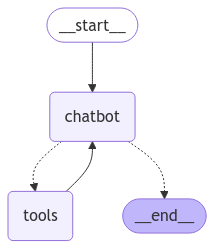

In [15]:
from IPython.display import display, Image

Image(financial_analyst_agent.get_graph().draw_mermaid_png())

## Test the Agent

In [16]:
from IPython.display import display, Markdown

response = llm.invoke('what is the PE ratio of Nvidia?')
display(Markdown(response.content))

I currently don't have real-time data access, so I can't provide the current price-to-earnings (P/E) ratio for Nvidia. To find the most up-to-date P/E ratio, you can check financial news websites, stock market apps, or financial services like Bloomberg, Yahoo Finance, or Google Finance.

In [17]:
def call_agent(agent, prompt, user_config={"configurable": {"thread_id": "any"}}):
    events = agent.stream(
        {"messages": [{"role": "user", "content": prompt}]},
        user_config,
        stream_mode="values",
    )

    for event in events:
        event["messages"][-1].pretty_print()

    print()
    print('Final Response:\n')
    display(Markdown(event["messages"][-1].content))

In [18]:
query = 'How is Nvidia doing and it is worth investing in it or its competitors?'
call_agent(financial_analyst_agent, query)

================================ Human Message =================================

How is Nvidia doing and it is worth investing in it or its competitors?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_HJVhjP4IymFD9LxKANaH8aZ6)
 Call ID: call_HJVhjP4IymFD9LxKANaH8aZ6
  Args:
    stock_name: Nvidia
  get_general_market_data (call_M2BVfd8DKTxOnn75ojKFvjE3)
 Call ID: call_M2BVfd8DKTxOnn75ojKFvjE3
  Args:
================================= Tool Message =================================
Name: get_general_market_data

Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:

Most actively traded stocks:

|    | symbol   | name                            |   price |      change |   percent_change |    volume |    open |    high |      low |   previous_close |     ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value 

### Nvidia's Current Performance

Nvidia Corporation (symbol: NVDA) is currently trading at \$118.42, with a recent change of -\$24.20, reflecting a -16.97% decrease. The stock has a market capitalization of approximately \$2.9 trillion. Here are some additional key metrics:

- **52-Week High/Low**: \$153.13 / \$60.70
- **50-Day Moving Average**: \$139.54
- **200-Day Moving Average**: \$121.60
- **Forward PE Ratio**: 28.74
- **Earnings Per Share (EPS) Forward**: \$4.12
- **Dividend Yield**: 0%

### General Market Overview

Nvidia is among the most actively traded stocks, indicating strong investor interest. The broader market data shows a mix of gainers and losers, with Nvidia being one of the top price losers recently.

### Investment Consideration

Investing in Nvidia or its competitors depends on various factors, including your investment goals, risk tolerance, and market conditions. Nvidia is a leading player in the semiconductor industry, known for its innovation in graphics processing units (GPUs) and AI technology. However, the recent price drop may reflect market volatility or specific challenges.

#### Competitors to Consider:
- **AMD (Advanced Micro Devices)**
- **Intel Corporation (INTC)**
- **Broadcom Inc. (AVGO)**
- **Taiwan Semiconductor Manufacturing Company (TSM)**

These companies are also significant players in the semiconductor industry and may offer different growth opportunities and risks.

### Final Thoughts

While Nvidia has shown strong historical performance, it's essential to conduct thorough research and consider market trends before making investment decisions. Diversifying your portfolio by considering competitors may also be a prudent strategy. Always consult with a financial advisor to align your investments with your financial goals.

In [19]:
query = 'what is the PE ratio of Nvidia?'
call_agent(financial_analyst_agent, query)

================================ Human Message =================================

what is the PE ratio of Nvidia?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_wZTqLEpNYVrta4T3cNmIoCzR)
 Call ID: call_wZTqLEpNYVrta4T3cNmIoCzR
  Args:
    stock_name: Nvidia
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name        |     cik |
|---:|:---------|:------------|--------:|
|  0 | NVDA     | NVIDIA CORP | 1045810 |
================================== Ai Message ==================================
Tool Calls:
  get_stock_fundamental_indicator_metrics (call_C9Us85uwt0JolBLTEFqjVPcc)
 Call ID: call_C9Us85uwt0JolBLTEFqjVPcc
  Args:
    stock_ticker: NVDA
================================= Tool Message =================================
Name: get_stock_fundamental_indicator_met

The PE ratio for Nvidia (symbol: NVDA) is currently 46.62. This metric is a key indicator used by investors to evaluate the valuation of a company relative to its earnings. Please let me know if you need more information!

In [20]:
query = 'what is the PE ratio of Intel?'
call_agent(financial_analyst_agent, query)

================================ Human Message =================================

what is the PE ratio of Intel?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_r1P1tHEFF9ZpF4gzkwLnFWjT)
 Call ID: call_r1P1tHEFF9ZpF4gzkwLnFWjT
  Args:
    stock_name: Intel
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name                                                           |     cik |
|---:|:---------|:---------------------------------------------------------------|--------:|
|  0 | INTC     | INTEL CORP                                                     |   50863 |
|  1 | CCCS     | CCC Intelligent Solutions Holdings Inc.                        | 1818201 |
|  2 | ZK       | ZEEKR Intelligent Technology Holding Ltd                       | 1954042 |
|  3 | NTLA     | Intel

The PE ratio for Intel Corporation (symbol: INTC) as of the latest available data is approximately 21.51.

In [21]:
query = 'which is better?'
call_agent(financial_analyst_agent, query)

================================ Human Message =================================

which is better?
================================== Ai Message ==================================

It seems like your question is incomplete. Are you asking about a comparison between two specific stocks or companies? If so, please provide the names or ticker symbols of the companies you're interested in. Alternatively, if you're looking for general advice on the stock market or specific metrics, please let me know so I can assist you accordingly!

Final Response:



It seems like your question is incomplete. Are you asking about a comparison between two specific stocks or companies? If so, please provide the names or ticker symbols of the companies you're interested in. Alternatively, if you're looking for general advice on the stock market or specific metrics, please let me know so I can assist you accordingly!

In [22]:
query = 'Get detailed information of how Nvidia and Intel are doing and do a comparative analysis of which stock might be better?'
call_agent(financial_analyst_agent, query)

================================ Human Message =================================

Get detailed information of how Nvidia and Intel are doing and do a comparative analysis of which stock might be better?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_U4htf7NuD99m9AZzNODJsjPt)
 Call ID: call_U4htf7NuD99m9AZzNODJsjPt
  Args:
    stock_name: Nvidia
  get_stock_ticker_symbol (call_eP6E71HDAVfm6obDbWKjbuat)
 Call ID: call_eP6E71HDAVfm6obDbWKjbuat
  Args:
    stock_name: Intel
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name                                                           |     cik |
|---:|:---------|:---------------------------------------------------------------|--------:|
|  0 | INTC     | INTEL CORP                                                     | 

Here's a detailed comparative analysis of Nvidia (NVDA) and Intel (INTC) based on the latest available data:

### Nvidia (NVDA)
- **Market Cap**: \$2.9 trillion
- **PE Ratio**: 46.62
- **Forward PE**: 26.63
- **PEG Ratio (TTM)**: 1.022
- **Price to Book Ratio**: 67.90
- **Price to Sales Ratio**: 25.32
- **Price to Free Cash Flows Ratio**: 57.08
- **Price to Operating Cash Flows Ratio**: 54.91
- **Dividend Yield**: 0.03%
- **Revenue Growth**: 122.4%
- **Earnings Growth**: 168%
- **Gross Margin**: 75.98%
- **Operating Margin**: 62.06%
- **Profit Margin**: 55.04%
- **Return on Assets**: 55.26%
- **Return on Equity**: 123.77%
- **Current Price**: \$118.42 (as of the last trading day)
- **52-Week High/Low**: \$153.13/\$60.70

### Intel (INTC)
- **Market Cap**: \$87.51 billion
- **Forward PE**: 21.51
- **PEG Ratio (TTM)**: 0.618
- **Price to Book Ratio**: 0.88
- **Price to Sales Ratio**: 3.88
- **Price to Free Cash Flows Ratio**: -14.75
- **Price to Operating Cash Flows Ratio**: 18.35
- **Dividend Yield**: 2.24%
- **Revenue Growth**: -6.2%
- **Gross Margin**: 40.07%
- **Operating Margin**: -1.05%
- **Profit Margin**: -29.42%
- **Return on Assets**: -0.26%
- **Return on Equity**: -15.60%
- **Current Price**: \$20.29 (as of the last trading day)
- **52-Week High/Low**: \$46.63/\$18.51

### Comparative Analysis
- **Growth and Profitability**: Nvidia shows strong growth and profitability metrics, with high revenue and earnings growth, and robust margins. Intel, on the other hand, is experiencing negative growth and profitability, with negative operating and profit margins.
- **Valuation**: Nvidia's valuation ratios are significantly higher, reflecting its growth potential and market position. Intel's lower valuation ratios may indicate a more value-oriented investment, but also reflect its current challenges.
- **Dividend Yield**: Intel offers a higher dividend yield, which may appeal to income-focused investors.
- **Risk and Volatility**: Nvidia has a higher beta (1.657) compared to Intel (1.026), indicating higher volatility.

### Conclusion
Nvidia appears to be a better choice for growth-oriented investors, given its strong financial performance and growth prospects. Intel may appeal to value investors looking for a turnaround story, but it currently faces significant challenges. As always, it's important to conduct your own research and consider your investment goals and risk tolerance before making any investment decisions.

We have successfully built an AI Agent which can do detailed financial analysis for us but it is not yet conversational. We will add in the that functionality in the next videos